# libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
os.chdir("D:\\titanic")

# importing data

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

# visualization

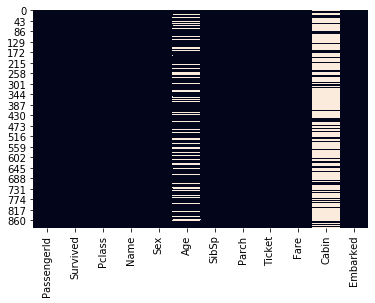

In [6]:
sns.heatmap(df.isnull(),cbar=False)

In [7]:
df=df[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare","Sex","Embarked"]]

In [9]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,male,S
1,2,1,1,38.0,1,0,71.2833,female,C
2,3,1,3,26.0,0,0,7.9250,female,S
3,4,1,1,35.0,1,0,53.1000,female,S
4,5,0,3,35.0,0,0,8.0500,male,S


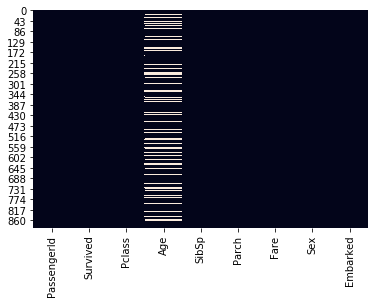

In [10]:
sns.heatmap(df.isnull(),cbar=False)

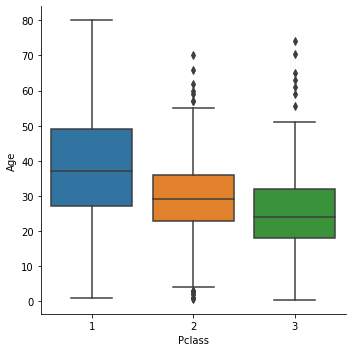

In [11]:
sns.catplot(y='Age',x='Pclass',kind='box',data=df)

# replacing NaN values in 'Age'

In [12]:
def fillage(a):
    for i in range(len(a["Fare"])):
        if a.iloc[i,3] not in range(100) and a.iloc[i,2]==1:
            a.iloc[i,3]=38
        elif a.iloc[i,3] not in range(100) and a.iloc[i,2]==2:
            a.iloc[i,3]=28
        elif a.iloc[i,3] not in range(100) and a.iloc[i,2]==3:
            a.iloc[i,3]=22    

In [13]:
fillage(df)

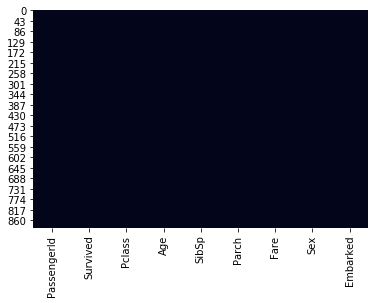

In [14]:
sns.heatmap(df.isnull(),cbar=False)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.0,1,0,7.2500,male,S
1,2,1,1,38.0,1,0,71.2833,female,C
2,3,1,3,26.0,0,0,7.9250,female,S
3,4,1,1,35.0,1,0,53.1000,female,S
4,5,0,3,35.0,0,0,8.0500,male,S


# creating dummy variable

In [16]:
df = pd.get_dummies(df, columns=["Sex","Embarked"])

In [17]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# preparing data

In [18]:
X=df.drop('Survived',axis=1)

In [19]:
Y=df['Survived']

# ML model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=model.predict(x_test)

In [26]:
type(pred)

numpy.ndarray

In [27]:
from sklearn.metrics import confusion_matrix


In [28]:
a=confusion_matrix(y_test,pred)

In [29]:
print(a)

[[159  15]
 [ 39  82]]


In [30]:
 from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       174
           1       0.85      0.68      0.75       121

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.80       295
weighted avg       0.82      0.82      0.81       295



In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
pred=model.predict(x_test)

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       174
           1       0.71      0.74      0.73       121

    accuracy                           0.77       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.77      0.77      0.77       295



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
pred=model.predict(x_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       174
           1       0.79      0.67      0.73       121

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295

